In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from tqdm import tnrange

# Test Voltage

In [7]:
idx = np.arange(1000,14000)

base_glm = np.load("/media/hdd01/sklee/cont_shglm/baseglm_CA1_sub6_test.npy")[idx]
hist_glm = np.load("/media/hdd01/sklee/cont_shglm/histglm_CA1_sub6_test.npy")[idx]
base_tcn = np.load("/media/hdd01/sklee/tcn/basetcn_CA1_sub6_test.npy")[idx]
hist_tcn = np.load("/media/hdd01/sklee/tcn/histtcn_CA1_sub6_test.npy")[idx]

#ref = np.load("/media/hdd01/sklee/tcn/L23_inputs/vdata_NMDA_ApN0.5_13_Adend_r0_o2_i2_g_b4.npy").flatten()[65000:-1][idx]
ref = np.load("/media/hdd01/sklee/CA1_inputs/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep16_stimseed1.npy")[:,:10000]
ref = ref.flatten()[65000:80000][idx]

In [8]:
base_glm_score = metrics.explained_variance_score(y_true=ref,
                                                      y_pred=base_glm,
                                                      multioutput='uniform_average')
hist_glm_score = metrics.explained_variance_score(y_true=ref,
                                                      y_pred=hist_glm,
                                                      multioutput='uniform_average')
base_tcn_score = metrics.explained_variance_score(y_true=ref,
                                                      y_pred=base_tcn,
                                                      multioutput='uniform_average')
hist_tcn_score = metrics.explained_variance_score(y_true=ref,
                                                      y_pred=hist_tcn,
                                                      multioutput='uniform_average')


In [25]:
fig, axs = plt.subplots(nrows=4, figsize = (20,10))

axs[0].plot(ref, color="black", linewidth=1)
axs[0].plot(base_glm- 20.5, color="red", linewidth=1)
axs[0].set_title("BaseGLM: "+str(round(base_glm_score, 5)), fontsize = 16)

axs[1].plot(ref, color="black", linewidth=1)
axs[1].plot(hist_glm - 19, color="red", linewidth=1)
axs[1].set_title("HistGLM: "+str(round(hist_glm_score, 5)), fontsize = 16)

axs[2].plot(ref, color="black", linewidth=1)
axs[2].plot(base_tcn - 49.5, color="red", linewidth=1)
axs[2].set_title("BaseTCN: "+str(round(base_tcn_score, 5)), fontsize = 16)

axs[3].plot(ref, color="black", linewidth=1)
axs[3].plot(hist_tcn - 64, color="red", linewidth=1)
axs[3].set_title("HistTCN: "+str(round(hist_tcn_score, 5)), fontsize = 16)

fig.tight_layout()
#plt.savefig("/media/hdd01/sklee/CA1_test_comparison.png", dpi=150, bbox_inches='tight')
#plt.close()

# Moving error analysis

In [13]:
ref1 = np.load("/media/hdd01/sklee/CA1_inputs/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep16_stimseed1.npy")[:,:10000]
ref1 = ref1.flatten()[65000:80000]
ref2 = np.load("/media/hdd01/sklee/CA1_inputs/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_noDendNa_Er0.5_Ir7.4_random_NR_rep16_stimseed1.npy")[:,:10000]
ref2 = ref2.flatten()[65000:80000]
ref_diff = ref1-ref2

base_glm = np.load("/media/hdd01/sklee/cont_shglm/baseglm_CA1_sub6_test.npy")
hist_glm = np.load("/media/hdd01/sklee/cont_shglm/histglm_CA1_sub6_test.npy")
base_tcn = np.load("/media/hdd01/sklee/tcn/basetcn_CA1_sub6_test.npy")
hist_tcn = np.load("/media/hdd01/sklee/tcn/histtcn_CA1_sub6_test.npy")

In [14]:
test_array = np.empty((4,15000))
test_array[0] = base_glm
test_array[1] = hist_glm
test_array[2] = base_tcn
test_array[3] = hist_tcn

In [15]:
var_exp_array = np.empty((4,4))
for i in range(4):
    for j in range(4):
        var_exp_array[i,j] = metrics.explained_variance_score(y_true=test_array[i],
                                                      y_pred=test_array[j],
                                                      multioutput='uniform_average')

In [18]:
fig, ax = plt.subplots()
im = ax.imshow(var_exp_array)
ax.set_xticks(np.arange(var_exp_array.shape[1]))
ax.set_yticks(np.arange(var_exp_array.shape[0]))
ax.set_xticklabels(["BaseGLM","HistGLM","BaseTCN","HistTCN"])
ax.set_yticklabels(["BaseGLM","HistGLM","BaseTCN","HistTCN"])
ax.set_ylabel("Reference Model")
ax.set_xlabel("Comparison Model")

for i in range(var_exp_array.shape[0]):
    for j in range(var_exp_array.shape[1]):
        text = ax.text(j, i, round(var_exp_array[i, j],4),
                       ha="center", va="center", color="w")
        
fig.tight_layout()
#plt.savefig("/media/hdd01/sklee/CA1_model_similarity.png", dpi=150, bbox_inches='tight')
#plt.close()

In [19]:
window = 300

ref_diff_mean = np.empty((ref1.shape[0] - window + 1))
for i in tnrange(ref_diff_mean.shape[0]):
    ref_diff_mean[i] = np.mean(ref_diff[i:i+window])

mov_avg = np.empty((5,ref1.shape[0] - window + 1))
for i in tnrange(mov_avg.shape[1]):
    ref_wind = ref1[i:i+window]
    mov_avg[0,i] = metrics.explained_variance_score(y_true=ref_wind,
                                                      y_pred=base_glm[i:i+window],
                                                      multioutput='uniform_average')
    mov_avg[1,i] = metrics.explained_variance_score(y_true=ref_wind,
                                                      y_pred=hist_glm[i:i+window],
                                                      multioutput='uniform_average')
    mov_avg[2,i] = metrics.explained_variance_score(y_true=ref_wind,
                                                      y_pred=base_tcn[i:i+window],
                                                      multioutput='uniform_average')
    mov_avg[3,i] = metrics.explained_variance_score(y_true=ref_wind,
                                                      y_pred=hist_tcn[i:i+window],
                                                      multioutput='uniform_average')

<ipython-input-19-4e8b1e5a3c00>:4: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for i in tnrange(ref_diff_mean.shape[0]):


<ipython-input-19-4e8b1e5a3c00>:8: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for i in tnrange(mov_avg.shape[1]):


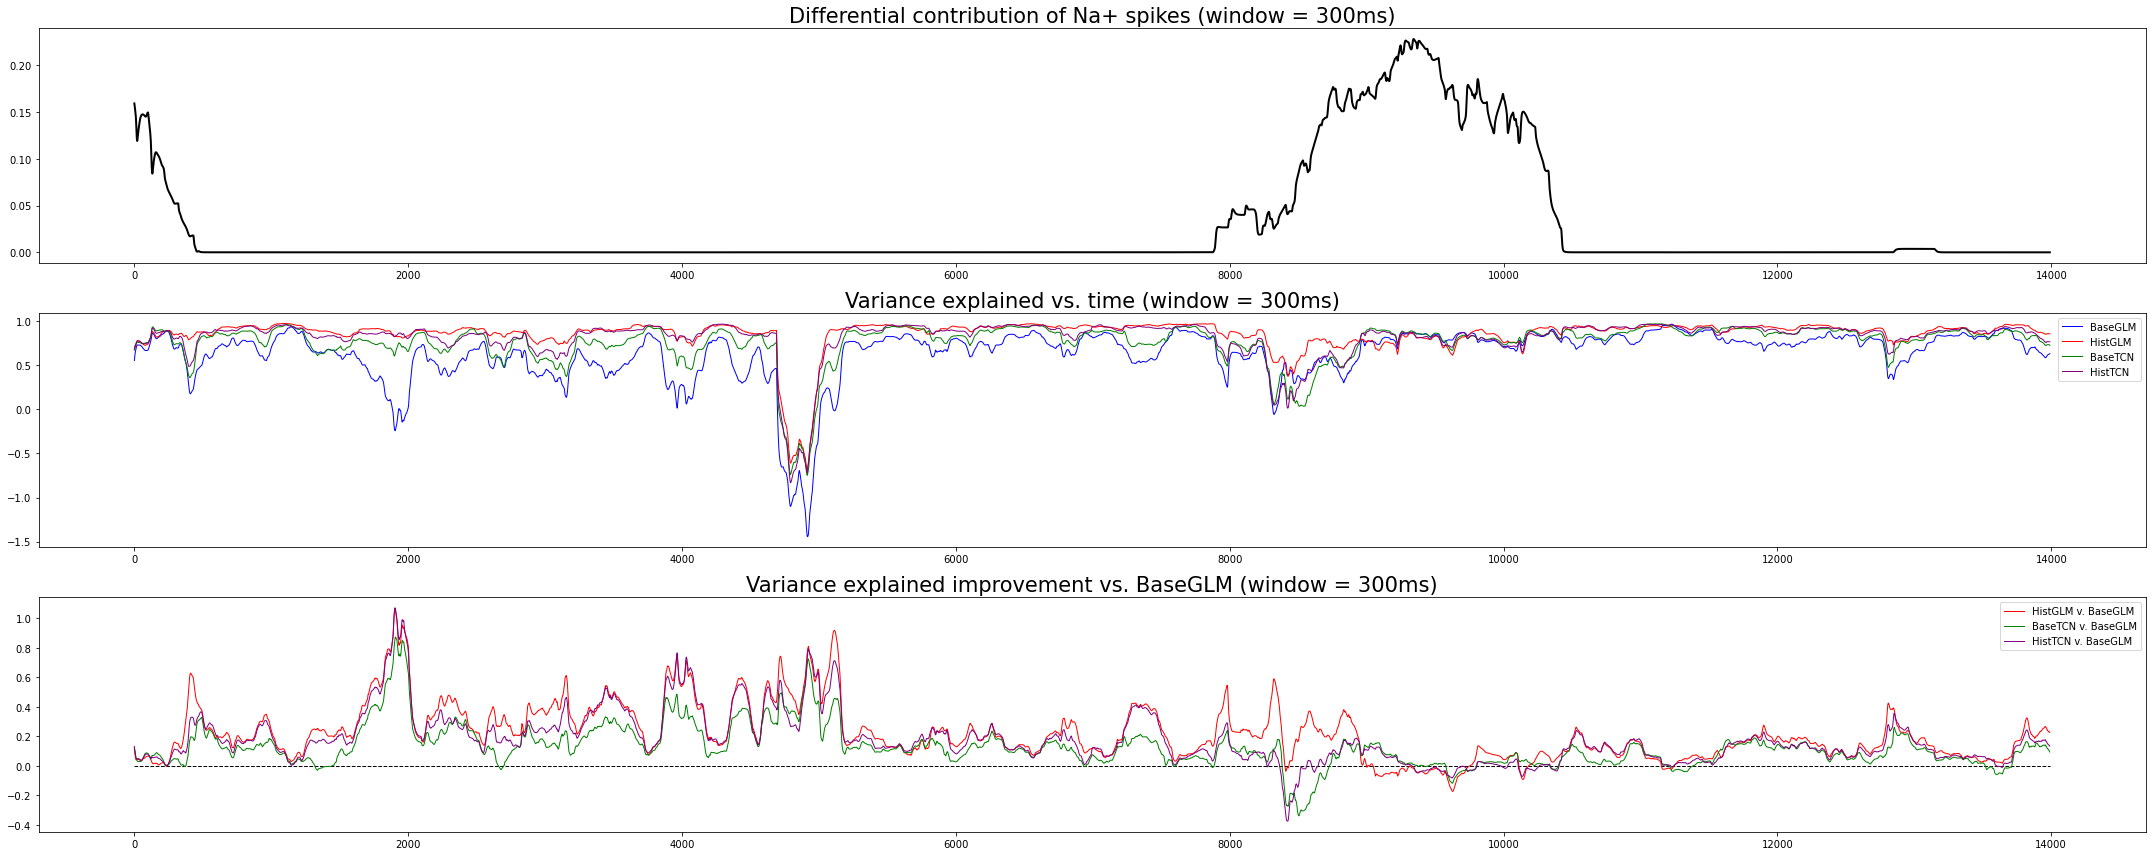

In [23]:
fig, axs = plt.subplots(nrows=3, figsize = (30,12))
idx = np.arange(0,14000)

axs[0].plot(ref_diff_mean[idx], linewidth=2, color="black")
axs[0].set_title("Differential contribution of Na+ spikes (window = 300ms)", fontsize = 21)

axs[1].plot(mov_avg[0][idx], linewidth=1, label="BaseGLM", color="blue")
axs[1].plot(mov_avg[1][idx], linewidth=1, label="HistGLM", color="red")
axs[1].plot(mov_avg[2][idx], linewidth=1, label="BaseTCN", color="green")
axs[1].plot(mov_avg[3][idx], linewidth=1, label="HistTCN", color="purple")
axs[1].legend()
axs[1].set_title("Variance explained vs. time (window = 300ms)", fontsize = 21)

axs[2].plot(mov_avg[1][idx] - mov_avg[0][idx], linewidth=1, label="HistGLM v. BaseGLM", color="red")
axs[2].plot(mov_avg[2][idx] - mov_avg[0][idx], linewidth=1, label="BaseTCN v. BaseGLM", color="green")
axs[2].plot(mov_avg[3][idx] - mov_avg[0][idx], linewidth=1, label="HistTCN v. BaseGLM", color="purple")


axs[2].legend()
axs[2].hlines(y=0, xmin=0, xmax=idx.shape[0], linewidth=1, linestyle="--")
axs[2].set_title("Variance explained improvement vs. BaseGLM (window = 300ms)", fontsize = 21)

fig.tight_layout()
#plt.savefig("/media/hdd01/sklee/L23_b4_var_exp_comparison.png", dpi=150, bbox_inches='tight')
#plt.close()

In [12]:
comp_array = np.empty((4,4))

for ref in range(4):
    for comp in range(4):
        diff = mov_avg[comp] - mov_avg[ref]
        comp_array[ref, comp] = np.corrcoef(diff, mov_avg[ref])[0][1]

/home/sklee/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/sklee/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [13]:
fig, axs = plt.subplots(ncols=4, nrows=4, figsize = (16,12))
for ref in range(4):
    for comp in range(4):
        if ref != comp:
            diff = mov_avg[comp] - mov_avg[ref]
            axs[ref, comp].scatter(mov_avg[ref], diff, s=0.1,color="gray")
            axs[ref, comp].hlines(y=0, xmin=np.min(mov_avg[ref]), xmax=np.max(mov_avg[ref]),
                                 linewidth=1, linestyle="--")
            axs[ref, comp].set_title("R^2 Corr: "+ str(round(comp_array[ref,comp],4)))
fig.tight_layout()

#fig.suptitle("Difference in Moving Avg. vs. Reference Moving Avg.", fontsize = 16)

axs[0,0].set_ylabel("Reference: BaseGLM", fontsize=14)
axs[1,0].set_ylabel("Reference: HistGLM", fontsize=14)
axs[2,0].set_ylabel("Reference: BaseTCN", fontsize=14)
axs[3,0].set_ylabel("Reference: HistTCN", fontsize=14)

axs[-1,0].set_xlabel("Comparison: BaseGLM", fontsize=14)
axs[-1,1].set_xlabel("Comparison: HistGLM", fontsize=14)
axs[-1,2].set_xlabel("Comparison: BaseTCN", fontsize=14)
axs[-1,3].set_xlabel("Comparison: HistTCN", fontsize=14)

#plt.savefig("/media/hdd01/sklee/L23_b4_var_exp_diff_comparison.png", dpi=150, bbox_inches='tight')
plt.close()

# Filter Analysis

In [2]:
base_glm_e = np.load("/media/hdd01/sklee/cont_shglm/baseglm_CA1_sub6_e_kern.npy")
base_glm_i = np.load("/media/hdd01/sklee/cont_shglm/baseglm_CA1_sub6_i_kern.npy")

hist_glm_e = np.load("/media/hdd01/sklee/cont_shglm/histglm_CA1_sub6_e_kern.npy")
hist_glm_i = np.load("/media/hdd01/sklee/cont_shglm/histglm_CA1_sub6_i_kern.npy")
hist_glm_hist = np.load("/media/hdd01/sklee/cont_shglm/histglm_CA1_sub6_hist_kern.npy")

base_tcn_e = np.load("/media/hdd01/sklee/tcn/basetcn_CA1_sub6_e_kern.npy")
base_tcn_i = np.load("/media/hdd01/sklee/tcn/basetcn_CA1_sub6_i_kern.npy")

hist_tcn_e = np.load("/media/hdd01/sklee/tcn/histtcn_CA1_sub6_e_kern.npy")
hist_tcn_i = np.load("/media/hdd01/sklee/tcn/histtcn_CA1_sub6_i_kern.npy")
hist_tcn_hist = np.load("/media/hdd01/sklee/tcn/histtcn_CA1_sub6_hist_kern.npy")

In [6]:
fig, axs = plt.subplots(ncols=6, figsize = (24,5))
for i in range(6):
    if i != 0:
        axs[i].plot(base_glm_e[i], label="BaseGLM: "+str(np.argmax(np.abs(base_glm_e[i])))+"ms")
        axs[i].plot(hist_glm_e[i], label="HistGLM: "+str(np.argmax(np.abs(hist_glm_e[i])))+"ms")
        axs[i].plot(base_tcn_e[i], label="BaseTCN: "+str(np.argmax(np.abs(base_tcn_e[i])))+"ms")
        axs[i].plot(hist_tcn_e[i], label="HistTCN: "+str(np.argmax(np.abs(hist_tcn_e[i])))+"ms")
        axs[i].legend()
        axs[i].set_title("Subunit "+str(i)+" E Kernel", fontsize = 16)
    
fig.tight_layout()
#plt.savefig("/media/hdd01/sklee/CA1_e_kern_comparison.png", dpi=150, bbox_inches='tight')
#plt.close()

In [8]:
fig, axs = plt.subplots(ncols=6, figsize = (24,5))
for i in range(6):
    axs[i].plot(base_glm_i[i], label="BaseGLM: "+str(np.argmax(np.abs(base_glm_i[i])))+"ms")
    axs[i].plot(hist_glm_i[i], label="HistGLM: "+str(np.argmax(np.abs(hist_glm_i[i])))+"ms")
    axs[i].plot(base_tcn_i[i], label="BaseTCN: "+str(np.argmax(np.abs(base_tcn_i[i])))+"ms")
    axs[i].plot(hist_tcn_i[i], label="HistTCN: "+str(np.argmax(np.abs(hist_tcn_i[i])))+"ms")
    axs[i].legend()
    axs[i].set_title("Subunit "+str(i)+" I Kernel", fontsize = 16)
    
fig.tight_layout()
#plt.savefig("/media/hdd01/sklee/CA1_i_kern_comparison.png", dpi=150, bbox_inches='tight')
#plt.close()

In [10]:
fig, axs = plt.subplots(ncols=6, figsize = (24,5))
for i in range(6):
    axs[i].plot(hist_glm_hist[i], label="HistGLM: "+str(np.argmax(np.abs(hist_glm_hist[i])))+"ms")
    axs[i].plot(hist_tcn_hist[i], label="HistTCN: "+str(np.argmax(np.abs(hist_tcn_hist[i])))+"ms")
    axs[i].hlines(y=0, xmin=0, xmax=100)
    axs[i].legend()
    axs[i].set_title("Subunit "+str(i)+" History Kernel", fontsize = 16)
    
fig.tight_layout()
#plt.savefig("/media/hdd01/sklee/CA1_hist_kern_comparison.png", dpi=150, bbox_inches='tight')
#plt.close()